https://afb.hashnode.dev/how-to-download-bulk-images-using-bing-image-downloader

In [1]:
!pip install bing-image-downloader

In [2]:
!pip install face_recognition

In [3]:
import os, sys
import glob
import json
import face_recognition

import numpy as np
import pandas as pd

from tqdm import tqdm_notebook
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
import matplotlib.patches as pathces

from bing_image_downloader.downloader import download
from PIL import Image

In [4]:
import warnings
warnings.filterwarnings("ignore")

#Import Data

In [5]:
with open('actors.json', 'r') as fp:
   dict_act = json.load(fp)

SIZE = 256

In [6]:
dict_act[0]["name"]

'Catherine Missal'

In [ ]:
dict_act[:2]

[{'name': 'Catherine Missal',
  'rating': 4875,
  'image_path': '/g3fsRgEoMxaqPayIMtGDWERqJ6A.jpg',
  'alternative_name': None,
  'objectID': '551486300'},
 {'name': 'Monica Bellucci',
  'rating': 3956,
  'image_path': '/z3sLuRKP7hQVrvSTsqdLjGSldwG.jpg',
  'alternative_name': 'Monica Anna Maria Bellucci',
  'objectID': '551486310'}]

In [7]:
df = pd.DataFrame(dict_act)

# Extract all names from the 'name' column
names = df['name'].tolist()

# Print the list of names
print(names)

['Catherine Missal', 'Monica Bellucci', 'Michael Doven', 'Jasmine Reate', 'Tom Cruise', 'Scarlett Johansson', 'Anna Raadsveld', 'Jason Statham', 'Emilia Clarke', 'Wentworth Miller', 'Dwayne Johnson', 'Rose Byrne', 'Rachel McAdams', 'Michelle Rodriguez', 'Tom Hanks', 'Jake Gyllenhaal', 'Tom Hardy', 'Chloë Grace Moretz', 'Johnny Depp', 'Arnold Schwarzenegger', 'Sarah Wayne Callies', 'Vincent Cassel', 'Lisa Ulliel', 'Rachel Weisz', 'Robin Williams', 'Chris Hemsworth', 'Edwige Fenech', 'Linda Fiorentino', 'Robert Downey Jr.', 'Alexandra Daddario', 'Anthony Hopkins', 'Claudia Koll', 'Lucy Liu', 'Samuel L. Jackson', 'Kate Beckinsale', 'Jordana Brewster', 'Ashley Benson', 'Charlize Theron', 'Rosamund Pike', 'Christian Bale', 'Jennifer Connelly', 'Adam Sandler', 'Paul Walker', 'Brad Pitt', 'Amy Adams', 'Milla Jovovich', 'Chris Evans', 'Amber Heard', 'Edward Norton', 'Julianne Moore', 'Carice van Houten', 'Evangeline Lilly', 'Michelle Monaghan', 'Forest Whitaker', 'Ben Stiller', 'Carla Gugino',

In [8]:
len(names)

500

#Download Dataset

In [12]:

# Iterate through each name and download 15 photos for each person
for name in names[:71]:
    dir_ = f'dataset/'
    # Create the directory if it doesn't exist
    os.makedirs(dir_, exist_ok=True)
    str_face=f'{name}'
    # Download a photo for the current name
    download(str_face,
             limit=15,
             output_dir=dir_,
             adult_filter_off=True,
             force_replace=False,
             timeout=60,
             verbose=True)


Streaming output truncated to the last 5000 lines.
[!] Error:: HTTP Error 404: Not Found
[%] Downloading Image #9 from http://www.theplace2.ru/archive/jack_black/img/JackBlack_VinceBucci-2.jpg
[%] File Downloaded !

[%] Downloading Image #10 from http://gazettereview.com/wp-content/uploads/2017/09/jack-black.jpg
[%] File Downloaded !

[%] Downloading Image #11 from http://p.fod4.com/p/channels/bhidf/profile/s=w1200/o=95/yV5zYdK4SjGcMCXVXFem_jackblack.jpg
[!] Issue getting: http://p.fod4.com/p/channels/bhidf/profile/s=w1200/o=95/yV5zYdK4SjGcMCXVXFem_jackblack.jpg
[!] Error:: HTTP Error 404: Not Found
[%] Downloading Image #11 from https://www.cheatsheet.com/wp-content/uploads/2020/04/jack-black.png
[%] File Downloaded !

[%] Downloading Image #12 from http://images.askmen.com/photos/jack-black/22220.jpg
[!] Issue getting: http://images.askmen.com/photos/jack-black/22220.jpg
[!] Error:: HTTP Error 530: 


[!!]Indexing page: 2

[%] Indexed 35 Images on Page 2.


[%] Downloading Image #12 

KeyboardInterrupt: ignored

In [9]:
!ls dataset/'Arnold Schwarzenegger'/


Image_10.jpg  Image_13.jpg  Image_1.jpg  Image_4.jpg  Image_7.jpg
Image_11.jpg  Image_14.jpg  Image_2.jpg  Image_5.jpg  Image_8.jpg
Image_12.jpg  Image_15.jpg  Image_3.jpg  Image_6.jpg  Image_9.jpg


In [10]:
glob.glob(f'dataset/''Arnold Schwarzenegger''/*')

['dataset/Arnold Schwarzenegger/Image_5.jpg',
 'dataset/Arnold Schwarzenegger/Image_7.jpg',
 'dataset/Arnold Schwarzenegger/Image_14.jpg',
 'dataset/Arnold Schwarzenegger/Image_8.jpg',
 'dataset/Arnold Schwarzenegger/Image_2.jpg',
 'dataset/Arnold Schwarzenegger/Image_13.jpg',
 'dataset/Arnold Schwarzenegger/Image_6.jpg',
 'dataset/Arnold Schwarzenegger/Image_10.jpg',
 'dataset/Arnold Schwarzenegger/Image_4.jpg',
 'dataset/Arnold Schwarzenegger/Image_9.jpg',
 'dataset/Arnold Schwarzenegger/Image_1.jpg',
 'dataset/Arnold Schwarzenegger/Image_11.jpg',
 'dataset/Arnold Schwarzenegger/Image_12.jpg',
 'dataset/Arnold Schwarzenegger/Image_3.jpg',
 'dataset/Arnold Schwarzenegger/Image_15.jpg']

In [11]:
for name in names[:1]:
    dir_ = f'dataset/{name}/'
    str_face="images/*"
    files=glob.glob(dir_+str_face)

    for file in files:
      try:
        image=Image.open(file)
        # откроем изображение image Image.open(i) # получим его размер
        size = image.size
        # получим коэффициент, на который нужно уменьшить/увеличить # изображение по одной из сторон до 256
        coef = SIZE / size[0]
        # изменяем размер изображения
        resized_image = image.resize(
            (int(size[0] * coef), int(size[1] * coef)))
        resized_image = resized_image.convert('RGB')
        resized_image.save(file)
      except:
        os.remove(file)



In [12]:
image=face_recognition.load_image_file("./dataset/Arnold Schwarzenegger/Image_1.jpg")
#return (top,right,bottom,left)
face_locations=face_recognition.face_locations(image)

In [13]:
#cordinates
xy=(face_locations[0][3],face_locations[0][0])
width=face_locations[0][1]-face_locations[0][3]
height=face_locations[0][2] -face_locations[0][0]


In [14]:
face_locations

[(502, 872, 1168, 206)]

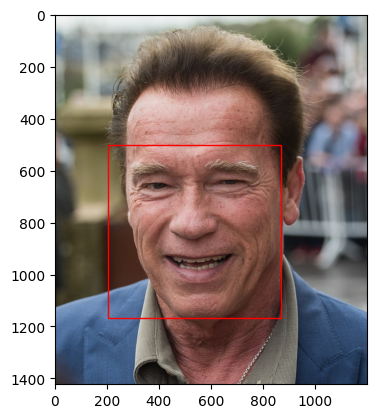

In [15]:
plt.imshow(image)
ax=plt.gca()

rect=pathces.Rectangle(xy,width,height,edgecolor='r',facecolor='none')
ax.add_patch(rect);


In [16]:
dict_labels={}
for i ,name in enumerate(names[:71]):
  key=name
  dict_labels[key]=i
dict_labels

{'Catherine Missal': 0,
 'Monica Bellucci': 1,
 'Michael Doven': 2,
 'Jasmine Reate': 3,
 'Tom Cruise': 4,
 'Scarlett Johansson': 5,
 'Anna Raadsveld': 6,
 'Jason Statham': 7,
 'Emilia Clarke': 8,
 'Wentworth Miller': 9,
 'Dwayne Johnson': 10,
 'Rose Byrne': 11,
 'Rachel McAdams': 12,
 'Michelle Rodriguez': 13,
 'Tom Hanks': 14,
 'Jake Gyllenhaal': 15,
 'Tom Hardy': 16,
 'Chloë Grace Moretz': 17,
 'Johnny Depp': 18,
 'Arnold Schwarzenegger': 19,
 'Sarah Wayne Callies': 20,
 'Vincent Cassel': 21,
 'Lisa Ulliel': 22,
 'Rachel Weisz': 23,
 'Robin Williams': 24,
 'Chris Hemsworth': 25,
 'Edwige Fenech': 26,
 'Linda Fiorentino': 27,
 'Robert Downey Jr.': 28,
 'Alexandra Daddario': 29,
 'Anthony Hopkins': 30,
 'Claudia Koll': 31,
 'Lucy Liu': 32,
 'Samuel L. Jackson': 33,
 'Kate Beckinsale': 34,
 'Jordana Brewster': 35,
 'Ashley Benson': 36,
 'Charlize Theron': 37,
 'Rosamund Pike': 38,
 'Christian Bale': 39,
 'Jennifer Connelly': 40,
 'Adam Sandler': 41,
 'Paul Walker': 42,
 'Brad Pitt': 43

In [17]:
embedings=np.empty(128)
target=[]

for person in tqdm_notebook(list(dict_labels.keys())):
  files=len(glob.glob(f'dataset/{person}/*'))
  if files<2:
    print(f'delete from dataset : {person}')
  else:
    images=os.listdir(f"./dataset/{person}")
    len_images=len(images)

    for num,person_img in enumerate(images):
      try:
        if person_img != '.DS_Store':
          face=face_recognition.load_image_file(
              f'dataset/{person}/{person_img}'
          )
          face_bounding_boxes=face_recognition.face_locations(face)

          if len(face_bounding_boxes)==1:
            try:
              face_enc=face_recognition.face_encodings(face)[0]
              embedings=np.vstack((embedings,face_enc))
              target.append(dict_labels[person])

            except Exception as ex:
              print(f"Error message {ex}")

      except Exception as ex:
        print(f"Error message {ex}")


  0%|          | 0/71 [00:00<?, ?it/s]

In [18]:
embedings_=embedings[1:]

In [19]:
embedings_.shape

(1016, 128)

In [20]:
len(target)

1016

In [21]:
with open ('embedings.pkl',"wb") as f:
  pickle.dump(embedings_,f)

with open ('labels.pkl',"wb") as f:
  pickle.dump(embedings_,f)

In [ ]:
'''with open ('embedings.pkl',"rb") as f:
  embedings_=pickle.load(f)

with open ('labels.pkl',"rb") as f:
  target=pickle.load(f) '''

In [22]:
X_train ,X_test, y_train,y_test=train_test_split(
    embedings_,target,test_size=0.3,stratify=target,random_state=42
)

In [49]:
X_train[0],y_train[0]

(array([-0.09829453,  0.03539062,  0.15795285,  0.04330096,  0.09115208,
        -0.11138143,  0.03417313, -0.00894947,  0.15281184, -0.05944104,
         0.35263377, -0.00183743, -0.15195701, -0.17763667,  0.09857241,
         0.12786862, -0.10665295, -0.12040031, -0.12074038, -0.09256208,
        -0.0452529 , -0.02626438,  0.0271789 , -0.01642131, -0.10499304,
        -0.29651439, -0.03423923, -0.16743308,  0.13638131, -0.07664578,
        -0.03764477,  0.00641265, -0.22147664, -0.0935644 , -0.05552093,
         0.06441917, -0.03121692, -0.09731419,  0.18256745, -0.04046069,
        -0.11418962, -0.03776637, -0.04293469,  0.24631421,  0.26028144,
         0.00642409,  0.0255816 ,  0.04956345,  0.0210536 , -0.27781844,
         0.06471026,  0.0519485 ,  0.1971674 ,  0.09218895,  0.03840554,
        -0.11391039,  0.01092485,  0.03325668, -0.19058746,  0.03678076,
         0.02710081, -0.04410405, -0.05358689, -0.0198693 ,  0.30563194,
         0.0758979 , -0.11088176, -0.09707892,  0.1

In [24]:
clf=LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [25]:
f1=f1_score(y_test,clf.predict(X_test),average='micro')
print(f'F1 score ={f1}')

F1 score =0.9770491803278688


In [56]:
y_test[0],clf.predict(X_test[0].reshape(1,-1))

(43, array([43]))

#testing on the real photo

In [26]:
def resize_image(SIZE,image):
   size = image.size
  # получим коэффициент, на который нужно уменьшить/увеличить # изображение по одной из сторон до 256
   coef = SIZE / size[0]
  # изменяем размер изображения
   resized_image = image.resize(
          (int(size[0] * coef), int(size[1] * coef)))
   res_image = resized_image.convert('RGB')
   return res_image


In [27]:
SIZE=1024
image=Image.open("my.jpg")
res_image=resize_image(SIZE,image)
res_image.save("my_test_res.jpg")


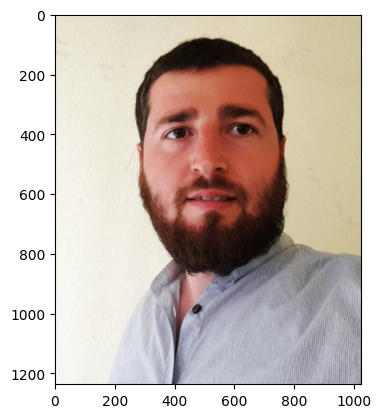

In [34]:
plt.imshow(res_image)

In [57]:
face=face_recognition.load_image_file('my_test_res.jpg')
face_bounding_boxes=face_recognition.face_locations(face)
face_enc=face_recognition.face_encodings(face)[0]
predict=clf.predict([face_enc])

In [65]:
predict[0]

48

In [81]:
def predict(path,model,dict_labels):
  face=face_recognition.load_image_file(path)
  face_bounding_boxes=face_recognition.face_locations(face)

  if len(face_bounding_boxes)!=1:
    print("Problem with founding face")
  else:
    face_enc=face_recognition.face_encodings(face)[0]
    predict=clf.predict([face_enc])
    predict_labels=list(dict_labels.keys())[predict[0]]

    predict_proba=clf.predict_proba([face_enc])

    return predict_labels,predict_proba

In [82]:
predict_name,predict_proba=predict("my_test_res.jpg",clf,dict_labels)

In [84]:
predict_name

'Edward Norton'

In [85]:
df=pd.DataFrame()
df['act']=list(dict_labels.keys())
df['score']=predict_proba[0]

In [88]:
df.sort_values(by="score")[::-1]

,act,score
48,Edward Norton,0.040734
21,Vincent Cassel,0.031107
15,Jake Gyllenhaal,0.030881
60,Sylvester Stallone,0.029544
41,Adam Sandler,0.029072
...,...,...
36,Ashley Benson,0.005217
5,Scarlett Johansson,0.004898
66,Jodi Lyn O'Keefe,0.004786
37,Charlize Theron,0.004734


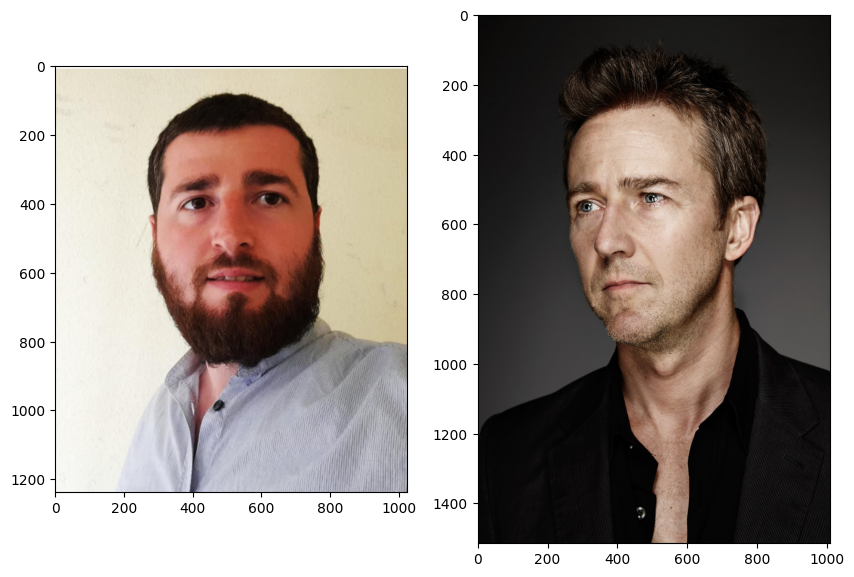

In [94]:
num_image=1

image1=face_recognition.load_image_file("my_test_res.jpg")
image2=face_recognition.load_image_file(f'./dataset/Edward Norton/Image_{num_image}.jpg')

fig ,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(image1)
ax[1].imshow(image2)

In [ ]:
def comparision(path_name,name_act,num_image):
    face_1=face_recognition.load_image_file(path_name)
    face_enc_1=face_recognition.face_encodings(face_1)[0]

    path_act=f'./dataset/Edward Norton/Image_{num_image}.jpg'

    face_2=face_recognition.load_image_file(name_act)
    face_enc_2=face_recognition.face_encodings(face_1)[0]

    return cosine_similarity(face_enc_1.reshape(1,-1),face_enc_2.reshape(1,-1)[0])

In [ ]:
len_files=len(glob.glob(f'./dataset/{predict_name}/*'))

cos=[]

for i in tqdm_notebook(range(len_files)):
  try:
    cos_=comparision('my_test_res.jpg',predict_name,i)
    cos.append(cos_)
    print(i.cos_)

  except Exception as ex:
    print(f"Error message {ex}")

print(f'mean score = {np.mean(cos)}')